# Milestone 4 - Independent Project

## Author - Kenneth Drabble



## Instructions

1. Generate a clear statement problem and provide the location for the datasetyou use.
2. Provide a clear solution to the problem for a non-technical audience.
3. Visually explore the data to generate insight and include summary statistics.
4. Use an appropriate statistical analysis method.
5. Prepare the data via cleaning, normalization, encoding, et cetera.
6. Generate and evaluate a working model (hypothesis, linear, or time series).
7. Draw direct inferences and conclusions from model results.
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

In [137]:
"""################ ABSTRACT ################
Housing pricing is a unique problem in that there are numerous factors that influence it: The size of a house, whether the
house is on the water, how tall it is, all are psosible factors when considering the price of a home. The Greater Seattle
are is uniquely affected by housing prices, as the last few decades have resulted in this area growing in cost greatly.
Therefore, it is unique to consider predicting the cost of houses in the King County Area as a problem worth examining. 
In this project for Milestone 4 of this course, I am examining how the King County Kaggle dataset can be used to predict
housing prices based on varying variables. Simply put, we can attempt to use  various factors to attempt to predict a home's
price using different types of regression analysis.
"""

"################ ABSTRACT ################\nHousing pricing is a unique problem in that there are numerous factors that influence it: The size of a house, whether the\nhouse is on the water, how tall it is, all are psosible factors when considering the price of a home. The Greater Seattle\nare is uniquely affected by housing prices, as the last few decades have resulted in this area growing in cost greatly.\nTherefore, it is unique to consider predicting the cost of houses in the King County Area as a problem worth examining. \nIn this project for Milestone 4 of this course, I am examining how the King County Kaggle dataset can be used to predict\nhousing prices based on varying variables. Simply put, we can attempt to use  various factors to attempt to predict a home's\nprice using different types of regression analysis.\n"

In [138]:
"""################ OVERVIEW #################
I have organized the code in this project by the numbers used to identify the different tasks in the file: 
'DATASCI 410 King County Housing Project', given on the Milestone 4 course page. I used these to outline the various types
of regressions we have learned about, and then identified the drawbacks and successes of each. The datast location path
is recognizable in cell 4.

Kaggle Home Price Prediction:  https://www.kaggle.com/harlfoxem/housesalesprediction
"""


"################ OVERVIEW #################\nI have organized the code in this project by the numbers used to identify the different tasks in the file: \n'DATASCI 410 King County Housing Project', given on the Milestone 4 course page. I used these to outline the various types\nof regressions we have learned about, and then identified the drawbacks and successes of each. The datast location path\nis recognizable in cell 4.\n\nKaggle Home Price Prediction:  https://www.kaggle.com/harlfoxem/housesalesprediction\n"

In [139]:
# LIBRARIES
from math import pi
import pandas as pd
import numpy.random as nr
import numpy as np
from math import sin
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn
import pymc3
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import sklearn.naive_bayes

In [140]:
# Location of dataset

# CHANGE THIS LOCAL PATH TO RUN ON DIFFERENT MACHINES
filepath = "C:/Users/Kenny/Downloads/DATASCI410/Milestones/kc_house_data.csv"
# CHANGE THIS LOCAL PATH TO RUN ON DIFFERENT MACHINES

houses = pd.read_csv(filepath, delimiter=',')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [141]:
# AUXILIARY FUNCTIONS
def create_model(x, y):
    model = pymc3.Model()

    with model:
        a = pymc3.Normal('a', mu=0, sd=.01)
        b = pymc3.Normal('b', mu=0, sd=.01)
        
        # We model the y variable (y_hat) as a linear function of our input 
        # array x, having intercept=a and slope=b.
        y_hat = a + b * x

        sigma = pymc3.Uniform('sigma', lower=0, upper=100)
        tau = pow(sigma, -2)

        # Here we assign our y array as the observed values of the model.
        y_obs = pymc3.Normal('y_obs', mu=y_hat, tau=tau, observed=y)

    return model

In [142]:
# PART 1: CONSTRUCTING AND INVERTING OUR MODEL MATRIX
# Target Features: Living Square Footage of living space, of the lot, Floors, Waterfront, Zipcode
# We may not use all of these features depending on evaluating our model, individual regressions, etc.
# However, we want to examine all of these for now: we use cleaning, normalization, and encoding for this step
home_vars = houses.loc[:,['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'zipcode']]
inM = home_vars.as_matrix()
price = houses.loc[:, 'price']
n_points = 21613

print('1st 5 rows of Data Frame: ')
print(home_vars.head())
print('\n1st 5 rows in matrix Form: ')
print(inM[0:5, :])

c:\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


1st 5 rows of Data Frame: 
   sqft_living  sqft_lot  floors  waterfront  zipcode
0         1180      5650     1.0           0    98178
1         2570      7242     2.0           0    98125
2          770     10000     1.0           0    98028
3         1960      5000     1.0           0    98136
4         1680      8080     1.0           0    98074

1st 5 rows in matrix Form: 
[[1.1800e+03 5.6500e+03 1.0000e+00 0.0000e+00 9.8178e+04]
 [2.5700e+03 7.2420e+03 2.0000e+00 0.0000e+00 9.8125e+04]
 [7.7000e+02 1.0000e+04 1.0000e+00 0.0000e+00 9.8028e+04]
 [1.9600e+03 5.0000e+03 1.0000e+00 0.0000e+00 9.8136e+04]
 [1.6800e+03 8.0800e+03 1.0000e+00 0.0000e+00 9.8074e+04]]


In [143]:
beta_coeffs, resids, rank, s = np.linalg.lstsq(inM, price)
print('beta coefficients: {}'.format(beta_coeffs))
print('\nsingular values: {}'.format(s))

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


beta coefficients: [ 2.73321240e+02 -2.89957264e-01  6.69602557e+03  8.31086726e+05
 -4.10605048e-01]

singular values: [1.46273874e+07 6.00387673e+06 1.32988465e+05 7.40517727e+01
 1.26488964e+01]


SSR: 7668417068204776.0
SST: 2912916761921299.5
R-squared = -1.6325561953740304


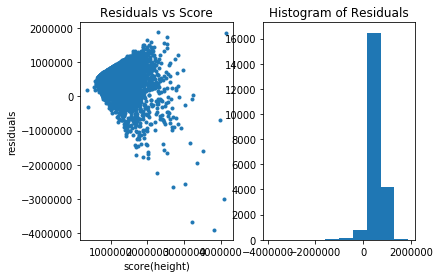

In [144]:
# PART 2: CURRENT MODEL EVALUATION
# 1/2: Error bounds using classical and bootstrap methods as below
# We can see our current components can be improved. We will back up to examine the linear regressions of several of the 
# components we initially chose, and select the one we will for a better model.
price_predictions = np.dot(inM, beta_coeffs) + np.mean(price)
price_resids = price_predictions - price

# Plot the residuals vs score (height)
plt.subplot(1, 2, 1)
plt.plot(price_predictions, price_resids, '.')
plt.ylabel('residuals')
plt.xlabel('score(height)')
plt.title('Residuals vs Score')

# Histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(price_resids)
plt.title('Histogram of Residuals')

# R-squared
#              SSR
# R^2 = 1 -  -------
#              SST

SSR = np.sum(np.square(price_resids))
SST = np.sum(np.square(price - np.mean(price)))

print('SSR: {}'.format(SSR))
print('SST: {}'.format(SST))

R2 = 1.0 - (SSR / SST)

print('R-squared = {}'.format(R2))

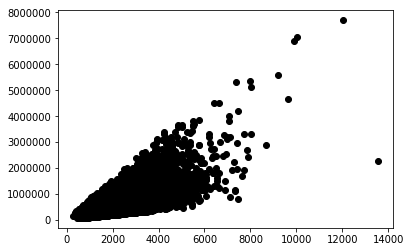

In [145]:
# 3: Investigating model success using individual variables
# Additional Metrics: Performing linear regressions on a few categories
# Sample of Initial grpahing of points, using the x axis as price and the y axis as the variable in question
living = pd.DataFrame({'x':home_vars['sqft_living'], 'y':price})
plt.plot(living['x'], living['y'], 'ko')

Intercept: -43580.74309
Slope : 280.62357


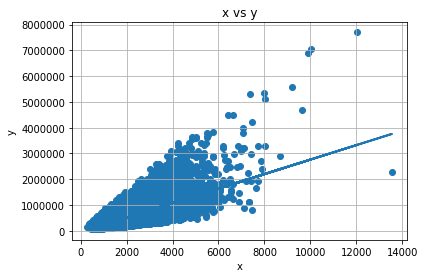

In [146]:
# Regression 1: Square footage of living space
# We can see a clear trend of price going up with the square footage of the house. This is notable as being one of our 
# easiest to understand metrics when considering home price prediction
linear_model1 = linear_model.LinearRegression()
x_input = living['x'].values.reshape(n_points, 1)
y_output = living['y'].values.reshape(n_points, 1)
linear_model1.fit(x_input, y_output)
y_pred = linear_model1.predict(x_input)
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
print('Intercept: {0:.5f}'.format(linear_model1.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model1.coef_[0][0]))

Intercept: 528082.61280
Slope : 0.79470


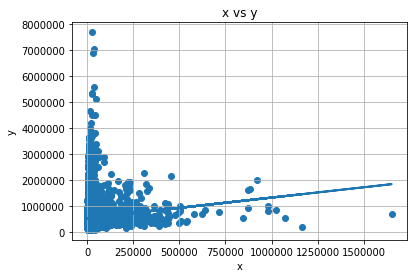

In [147]:
# Regression 2: Square footage of Lot
# This trend is less important than the square footage of the home, the trend is less noticeable.
lot = pd.DataFrame({'x':home_vars['sqft_lot'], 'y':price})
linear_model2 = linear_model.LinearRegression()
x_input = lot['x'].values.reshape(n_points, 1)
y_output = lot['y'].values.reshape(n_points, 1)
linear_model2.fit(x_input, y_output)
y_pred = linear_model2.predict(x_input)
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
print('Intercept: {0:.5f}'.format(linear_model2.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model2.coef_[0][0]))

Intercept: 279198.51119
Slope : 174588.81258


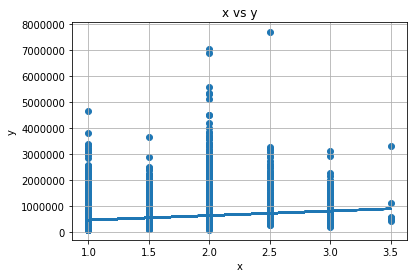

In [148]:
# Regression 3: Number of Floors
# This regression aslo appears to be worse than home square footage. However, the trend still remains upwards, which means
# This will be useful for additional regressions like Bayesian regression.
floors = pd.DataFrame({'x':home_vars['floors'], 'y':price})
linear_model3 = linear_model.LinearRegression()
x_input = floors['x'].values.reshape(n_points, 1)
y_output = floors['y'].values.reshape(n_points, 1)
linear_model3.fit(x_input, y_output)
y_pred = linear_model3.predict(x_input)
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
print('Intercept: {0:.5f}'.format(linear_model3.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model3.coef_[0][0]))

In [149]:
# 3/4: Linear Regression Model Analysis and improvements by eliminating some variables for addtiional regression
# I determined that using waterfront, or zipcode, would not be pertinent to graph in the ways shown above.
# We can drop the feature of number of floors, since I think it might skew the data we are using. We can say that
# we are attempting to reduce the over-parameterization of our initial model. I note that we WOULD be able to use zipcodes
# If we encoded each zipcode to a unique category, but we do not know how many zipcodes there would be, and if a large
# number would affect the performance of our models.

In [150]:
# 5a) SVD and Ridge Improvements 
# Ridge Improvement:
# Ridge Regression with various penalties in Statsmodels
# Generate a sequence of lambdas
log_lambda_seq = np.linspace(-6, 2, 50)
lambda_seq = np.exp(log_lambda_seq)

coeffs_array = []
rsq_array = []
formula = 'price ~ sqft_living + sqft_lot + floors + 1'

for lamb in lambda_seq:
    ridge_model = sm.ols(formula, data=home_vars).fit_regularized(method='elastic_net', alpha=lamb, L1_wt=0)
    coeffs_array.append(list(ridge_model.params))
    predictions = ridge_model.fittedvalues
    residuals = [x - y for x, y in zip(np.squeeze(predictions), price)]

    SSR = np.sum(np.square(residuals))
    SST = np.sum(np.square(price - np.mean(price)))

    rsq = 1 - (SSR / SST)
    rsq_array.append(rsq)

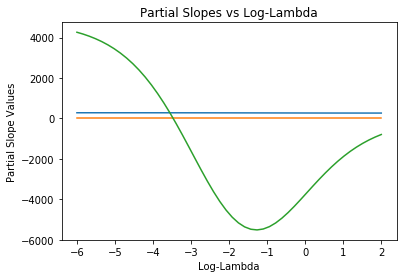

In [151]:
# Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.title('Partial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')

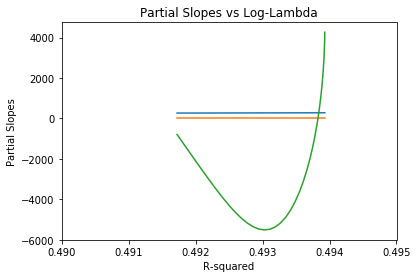

In [152]:
# Plot partial slopes vs R squared (% deviance explained)
plt.plot(rsq_array, beta_coeffs)
plt.xlim([0.49, .495])
plt.title('Partial Slopes vs Log-Lambda')
plt.xlabel('R-squared')
plt.ylabel('Partial Slopes')

In [153]:
# 5b) SVD and Lasso Improvements
# Lasso Regression
log_lambda_seq = np.linspace(-6, 2, 50)
lambda_seq = np.exp(log_lambda_seq)

coeffs_array = []
rsq_array = []
formula = 'price ~ sqft_living + sqft_lot + floors + 1'

for lamb in lambda_seq:
    ridge_model = sm.ols(formula, data=home_vars).fit_regularized(method='elastic_net', alpha=lamb, L1_wt=1)
    coeffs_array.append(list(ridge_model.params))
    predictions = ridge_model.fittedvalues
    residuals = [x - y for x, y in zip(np.squeeze(predictions), price)]

    SSR = np.sum(np.square(residuals))
    SST = np.sum(np.square(price - np.mean(price)))

    rsq = 1 - (SSR / SST)
    rsq_array.append(rsq)

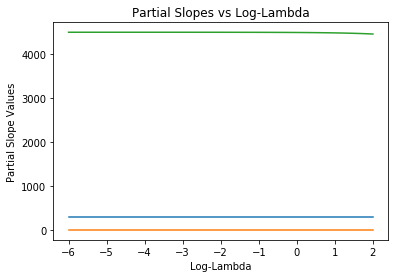

In [154]:
# Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.title('Partial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')

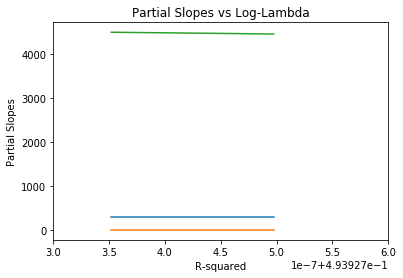

In [155]:
# Plot partial slopes vs R squared (% deviance explained)
plt.plot(rsq_array, beta_coeffs)
plt.xlim([0.4939273, .4939276])
plt.title('Partial Slopes vs Log-Lambda')
plt.xlabel('R-squared')
plt.ylabel('Partial Slopes')

In [156]:
home_vars.head()

,sqft_living,sqft_lot,floors,waterfront,zipcode
0,1180,5650,1.0,0,98178
1,2570,7242,2.0,0,98125
2,770,10000,1.0,0,98028
3,1960,5000,1.0,0,98136
4,1680,8080,1.0,0,98074


In [157]:
# 7) BAYESIAN ANALYSIS: Our Bayesian analysis uses our multiple data variables measured against our price variable. We 
# decide to use a naive Bayes methodology to predict prices.
import sklearn.naive_bayes

feature_vecs = home_vars.values

In [158]:
# Define the model
model = sklearn.naive_bayes.MultinomialNB(alpha=1e-7)
# Train the model with our votes dataset
model.fit(feature_vecs, houses['price'])

MultinomialNB(alpha=1e-07, class_prior=None, fit_prior=True)

In [159]:
# OUR NAIVE BAYES REUSLTS
# We print the first 20 predicted prices against the actual prices of homes
predicted_price = model.predict(feature_vecs[:20])
party_probabilities = model.predict_proba(feature_vecs[:20])
results = pd.DataFrame({
        'Real Price': houses['price'][:20],
        'Predicted Price': predicted_price,
        })
results

,Real Price,Predicted Price
0,221900.0,168000.0
1,538000.0,429900.0
2,180000.0,81000.0
3,604000.0,509000.0
4,510000.0,405000.0
5,1225000.0,1089000.0
6,257500.0,436000.0
7,291850.0,291850.0
8,229500.0,389000.0
9,323000.0,457000.0


In [ ]:
# 8) CONCLUSION ANALYSIS
"""
Our results used multiple different regression styles to attempt to solve the problem of guessing a home's price. Overall,
I found the Bayesian analysis to be the best at solving this problem. We can see the results very clear, they were often 
very close in correctness, and the tools we used abstract away from the data very easily for us to analyze. We could
have played around with the variables being used here to make it more accurate, but our earlier feauture selection helped
to make sure our current variables were good enough.

The linear regressions were useful for seeing the trends inherent in each variable. While some variables were better than
others at predicting price, these trends helped give us an idea of how each variable reacts to the price.

The Ridge/Lasso regressions, while complex, gave us some additional knolwedge of how each of our final features related to
our RSS and RSS^2 values. I think these could have been improved using more, rather than fewer features selected from
our original set.

Using all of these regressions in tandem was more succesful than any one individually. I think it is important to examine
all data projections in order to make claims about how data actuall functions.
"""